# # EE769 Assignment-3
Mirza Aman Baig(213230007)  
Rohan Appaso More(213230013)

**Question No. 3**

Visualize and train kernal PCA and finding explained variance and reconstruct the data

**Principal Component Analysis, or PCA** is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.  
In this question we will first try to visualize the data and take insights about the next operations to be performed on dataset  
Then we will train the PCA model and find explained variance for PCA. And the Reconstruct the data for various PCA dimensions

In [60]:
#importing some important useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
#importing training data
train_df = pd.read_csv('DataPCA.csv')

In [62]:
train_df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [63]:
print(train_df.shape)

(190, 7)


In [64]:
#checking the unique values
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + " is of type " + str(train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(train_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

x1 is of type float64 has 190 unique values, and 0 null entries
x2 is of type float64 has 190 unique values, and 0 null entries
x3 is of type float64 has 190 unique values, and 0 null entries
x4 is of type float64 has 190 unique values, and 0 null entries
x5 is of type float64 has 190 unique values, and 0 null entries
x6 is of type float64 has 190 unique values, and 0 null entries
x7 is of type float64 has 190 unique values, and 0 null entries


In [65]:
# collection of numeric type features into num_df dataframe
X = train_df.select_dtypes(include=['int64','float64']).copy()
X.head(2)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605


**Visualizing the Data**

In [66]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


We can see here standard deviation is higher for x4 column

AS we want to see relation between the components the most suitable plot will be pairplot

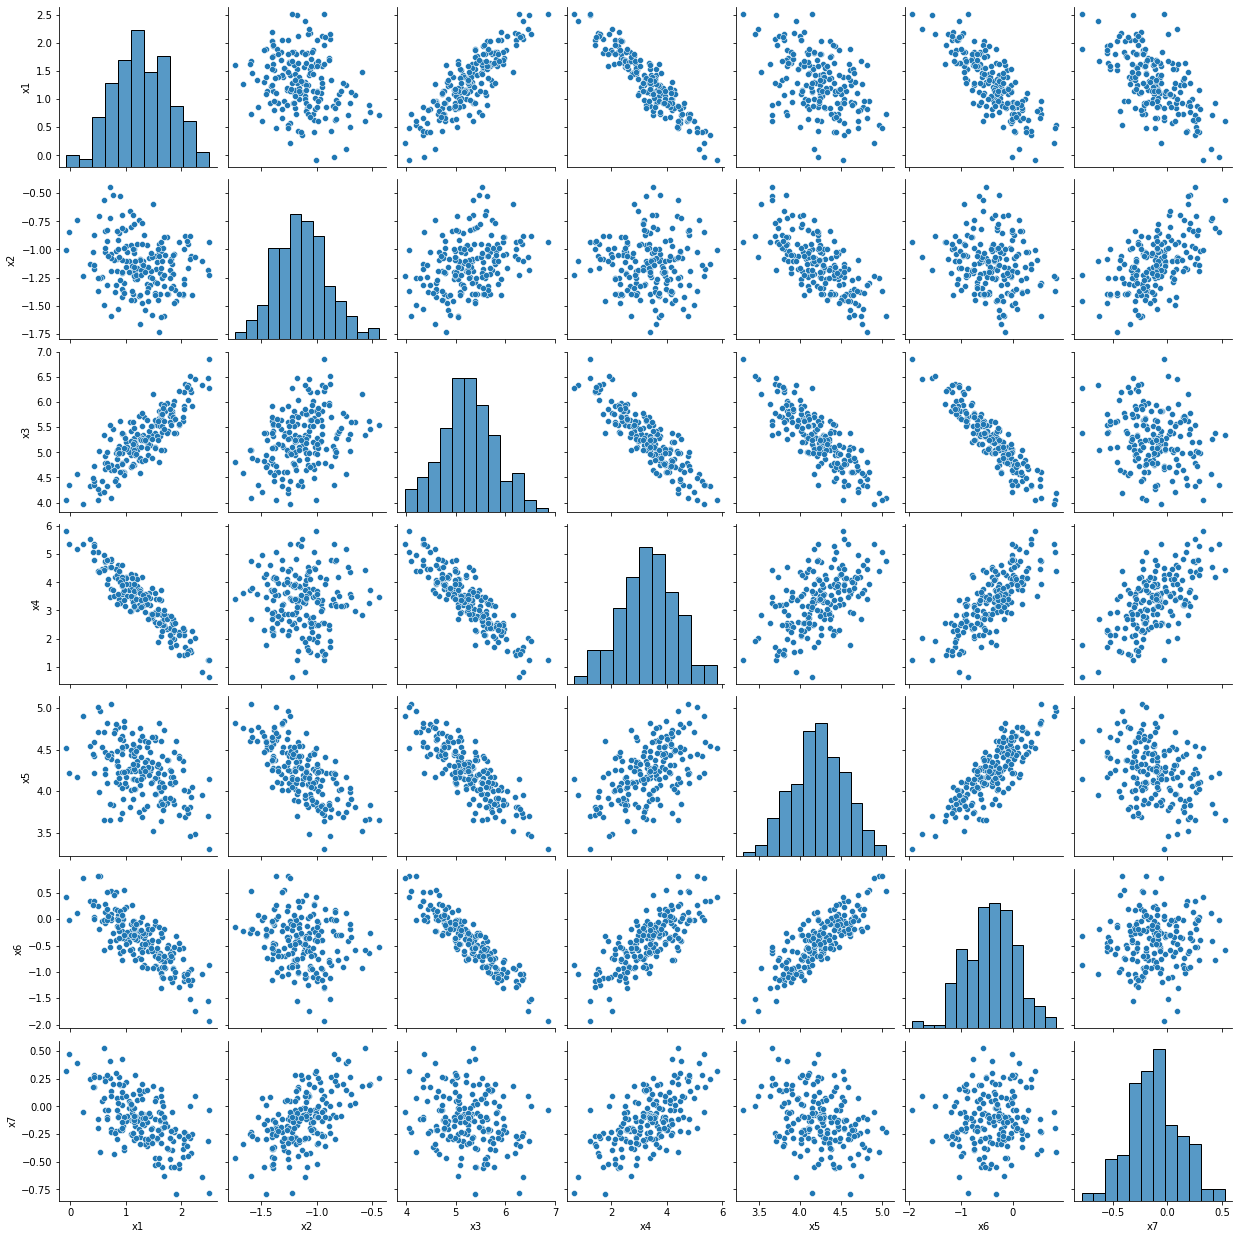

In [67]:
sns.pairplot(X)

The pairplot for the given data looks perfect but we need to scale the dataset before applying PCA

**Training the PCA Model**

In [83]:
# defining a function to find covariance matrix as it will  be useful in finding eigen values and eigen vectors
def get_sample_cov_matrix(X):
    X = X - np.mean(X, 0)
    cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
    return cov_matrix

In [84]:
# this function is capable of finding eigen values and eigen vectors  
def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]

    return evals, evectors

In [85]:
# here we will train the pca using score, eigen vectors and eigen values 
def pca(X):
    X = X - np.mean(X, 0)
    cov_matrix = get_sample_cov_matrix(X)
    evals, evectors = np.linalg.eigh(cov_matrix)
    evals, evectors = sort_evals_descending(evals, evectors)
    score = change_of_basis(X, evectors)
    return score, evectors, evals



In [86]:
def change_of_basis(X, W):
    Y = np.matmul(X, W)
    return Y

In [87]:
def plot_eigenvalues(evals, limit=True):
    plt.figure()
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.show()

**Screen plot for eigen values of different components**

C:\Users\rohan\AppData\Local\Temp/ipykernel_33084/1862759934.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)


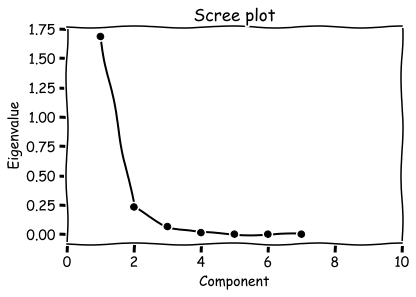

In [88]:
# Perform PCA

score, evectors, evals = pca(X)

# Plot the eigenvalues
with plt.xkcd():
    plot_eigenvalues(evals, limit=False)
    plt.xlim([0, 10])


In the above plot between eigen values and components we can see that eigen value of one component is above 1 and that for other components is between 0 to 1.

**Variance explained versus PCA**

In [75]:
def plot_variance_explained(variance_explained):
    plt.figure()
    plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
    plt.xlabel('Number of components')
    plt.ylabel('Variance explained')
    plt.show()

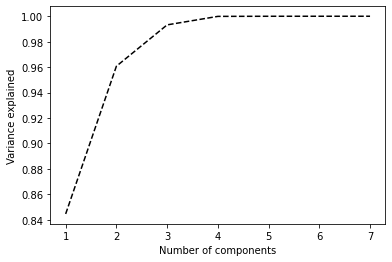

In [76]:
def get_variance_explained(evals):
     # Cumulatively sum the eigenvalues
    csum = np.cumsum(evals)

    # Normalize by the sum of eigenvalues
    variance_explained = csum / np.sum(evals)

    return variance_explained
variance_explained = get_variance_explained(evals)
plot_variance_explained(variance_explained)


The above plot is for variance explained versus PCA dimensions for up to 7 dimensions. 

In [89]:
variance_explained

array([0.84457061, 0.96071462, 0.99321342, 0.99989364, 0.99998254,
       0.99999829, 1.        ])

From the above graph of explained variance versus PCA we can see that almost 99% of variance is shown by 3 principal components  
Out of which first one contribute to 85% of variance

**Reconstructing the data with various numbers of PCA dimensions**

In [90]:
#Reconstructing using Inverse Transform
from sklearn.decomposition import PCA, IncrementalPCA
k=7
ipca = IncrementalPCA(n_components=k)
X_reconstructed1 = ipca.inverse_transform(ipca.fit_transform(X))
 


https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/

In [91]:
X_recn= pd.DataFrame(X_reconstructed1)
# sns.pairplot(X_recn)

In [92]:
X_recn.head()

,0,1,2,3,4,5,6
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


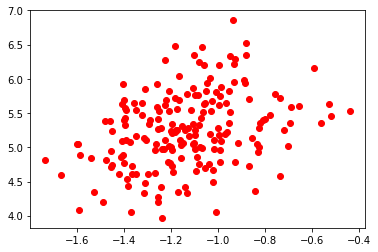

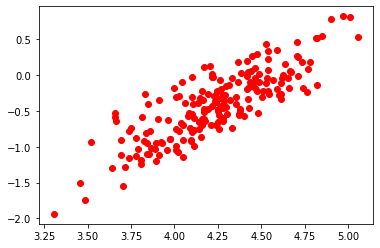

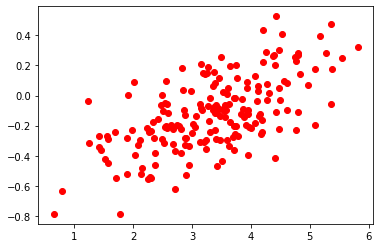

In [93]:
plt.scatter(X_recn[1], X_recn[2],c='red',cmap =plt.cm.winter);

plt.show()
plt.scatter(X_recn[4], X_recn[5],c='red',cmap =plt.cm.winter);

plt.show()
plt.scatter(X_recn[3], X_recn[6],c='red',cmap =plt.cm.winter);

plt.show()

from the above three plots we can see that we have successfully reconstructed the data using PCA dimesion and we can crosscheck by comparing it with the pairplot of the original data

**Calculating MSE**

In [94]:
# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X,  X_recn)
print(mse)

4.1350975647052696e-32
